# Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

# Import Libraries

In [111]:
#data processing
import pandas as pd
import numpy as np


#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# machine learning algorithms
import sklearn
from scipy.stats import loguniform
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [112]:
df=pd.read_csv("temperature.csv")

In [113]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [114]:
df.shape

(7752, 25)

In [115]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [117]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [118]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [119]:
#drop null values
df=df.dropna(how='any',axis=0)

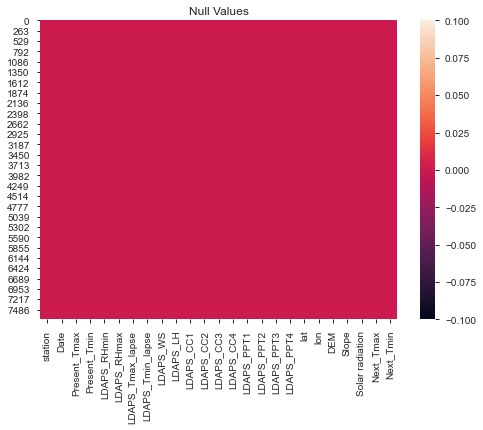

In [120]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [121]:
#Convert Date into Day, Year and Month attributes
df["Day"] = df['Date'].str.split('-').str[0].astype(int)
df["Month"] = df['Date'].str.split('-').str[1].astype(int)
df["Year"] = df['Date'].str.split('-').str[2].astype(int)
df.drop(["Date"], axis = 1, inplace = True)

In [122]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


# Exploratory Data Analysis

Text(0.5, 1.0, 'Next Day Tmax distribution')

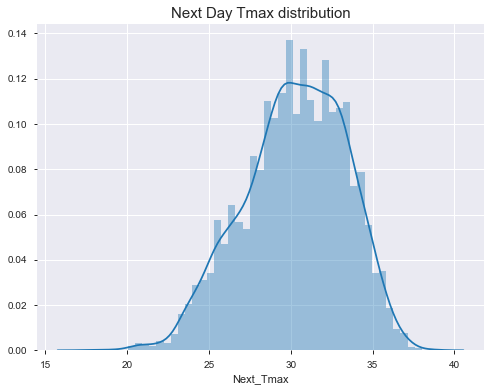

In [123]:
plt.figure(figsize=(8,6))
sns.distplot(df['Next_Tmax'])
plt.title('Next Day Tmax distribution', size=15)

Text(0.5, 1.0, 'Next Day Tmin distribution')

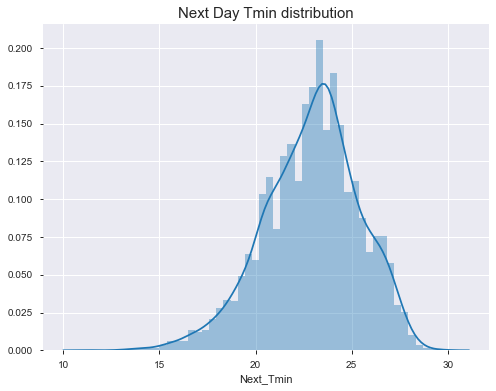

In [124]:
plt.figure(figsize=(8,6))
sns.distplot(df['Next_Tmin'])
plt.title('Next Day Tmin distribution', size=15)

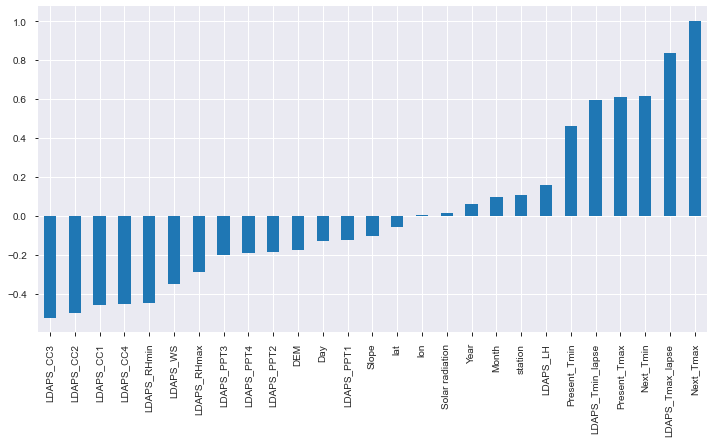

In [125]:
plt.figure(figsize=(12,6))
df.corr()['Next_Tmax'].sort_values().plot(kind='bar')

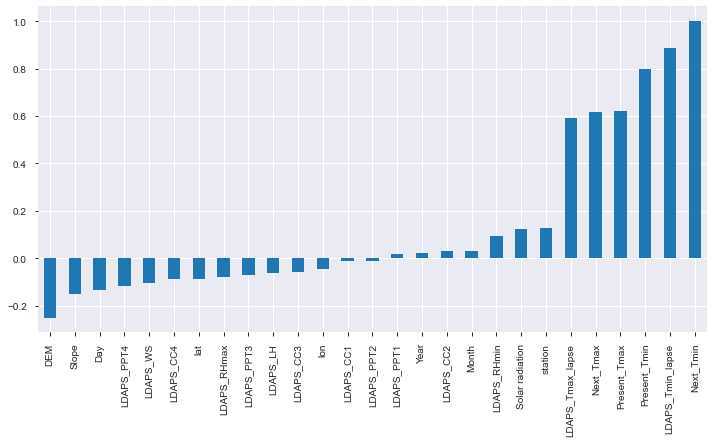

In [126]:
plt.figure(figsize=(12,6))
df.corr()['Next_Tmin'].sort_values().plot(kind='bar')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Solar Radiation wrt Next Tmax')

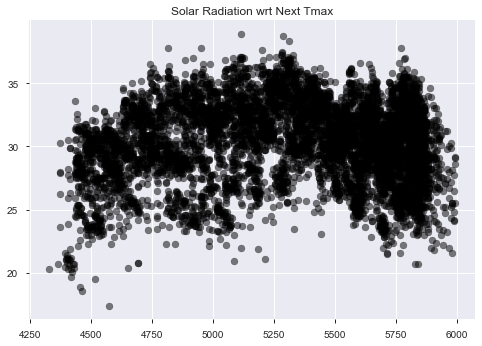

In [130]:
plt.scatter(df["Solar radiation"],df["Next_Tmax"],alpha=0.5,c=(0,0,0)) #Example of Bivariate analysis
plt.title("Solar Radiation wrt Next Tmax")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'DEM wrt Next Tmin')

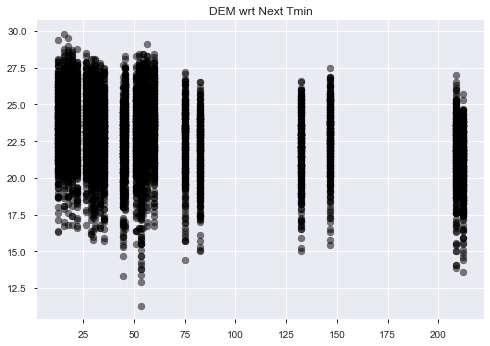

In [131]:
plt.scatter(df["DEM"],df["Next_Tmin"],alpha=0.5,c=(0,0,0)) #Example of Bivariate analysis
plt.title("DEM wrt Next Tmin")

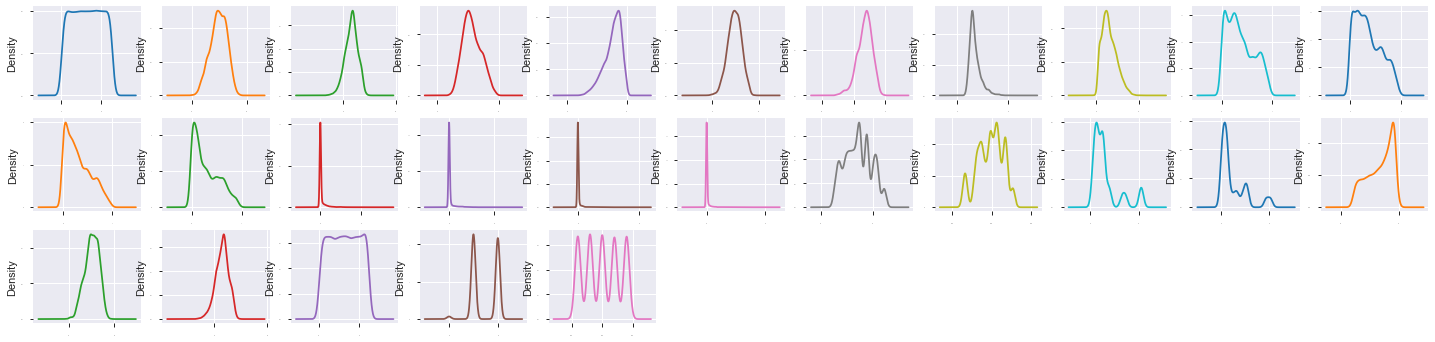

In [132]:
df.plot(kind='density', subplots=True, layout=(6,11), legend=False, sharex=False, fontsize=1, figsize=(25,12)) 
plt.show()

Skewness is observed in the data distribution

# Data Pre-Processing

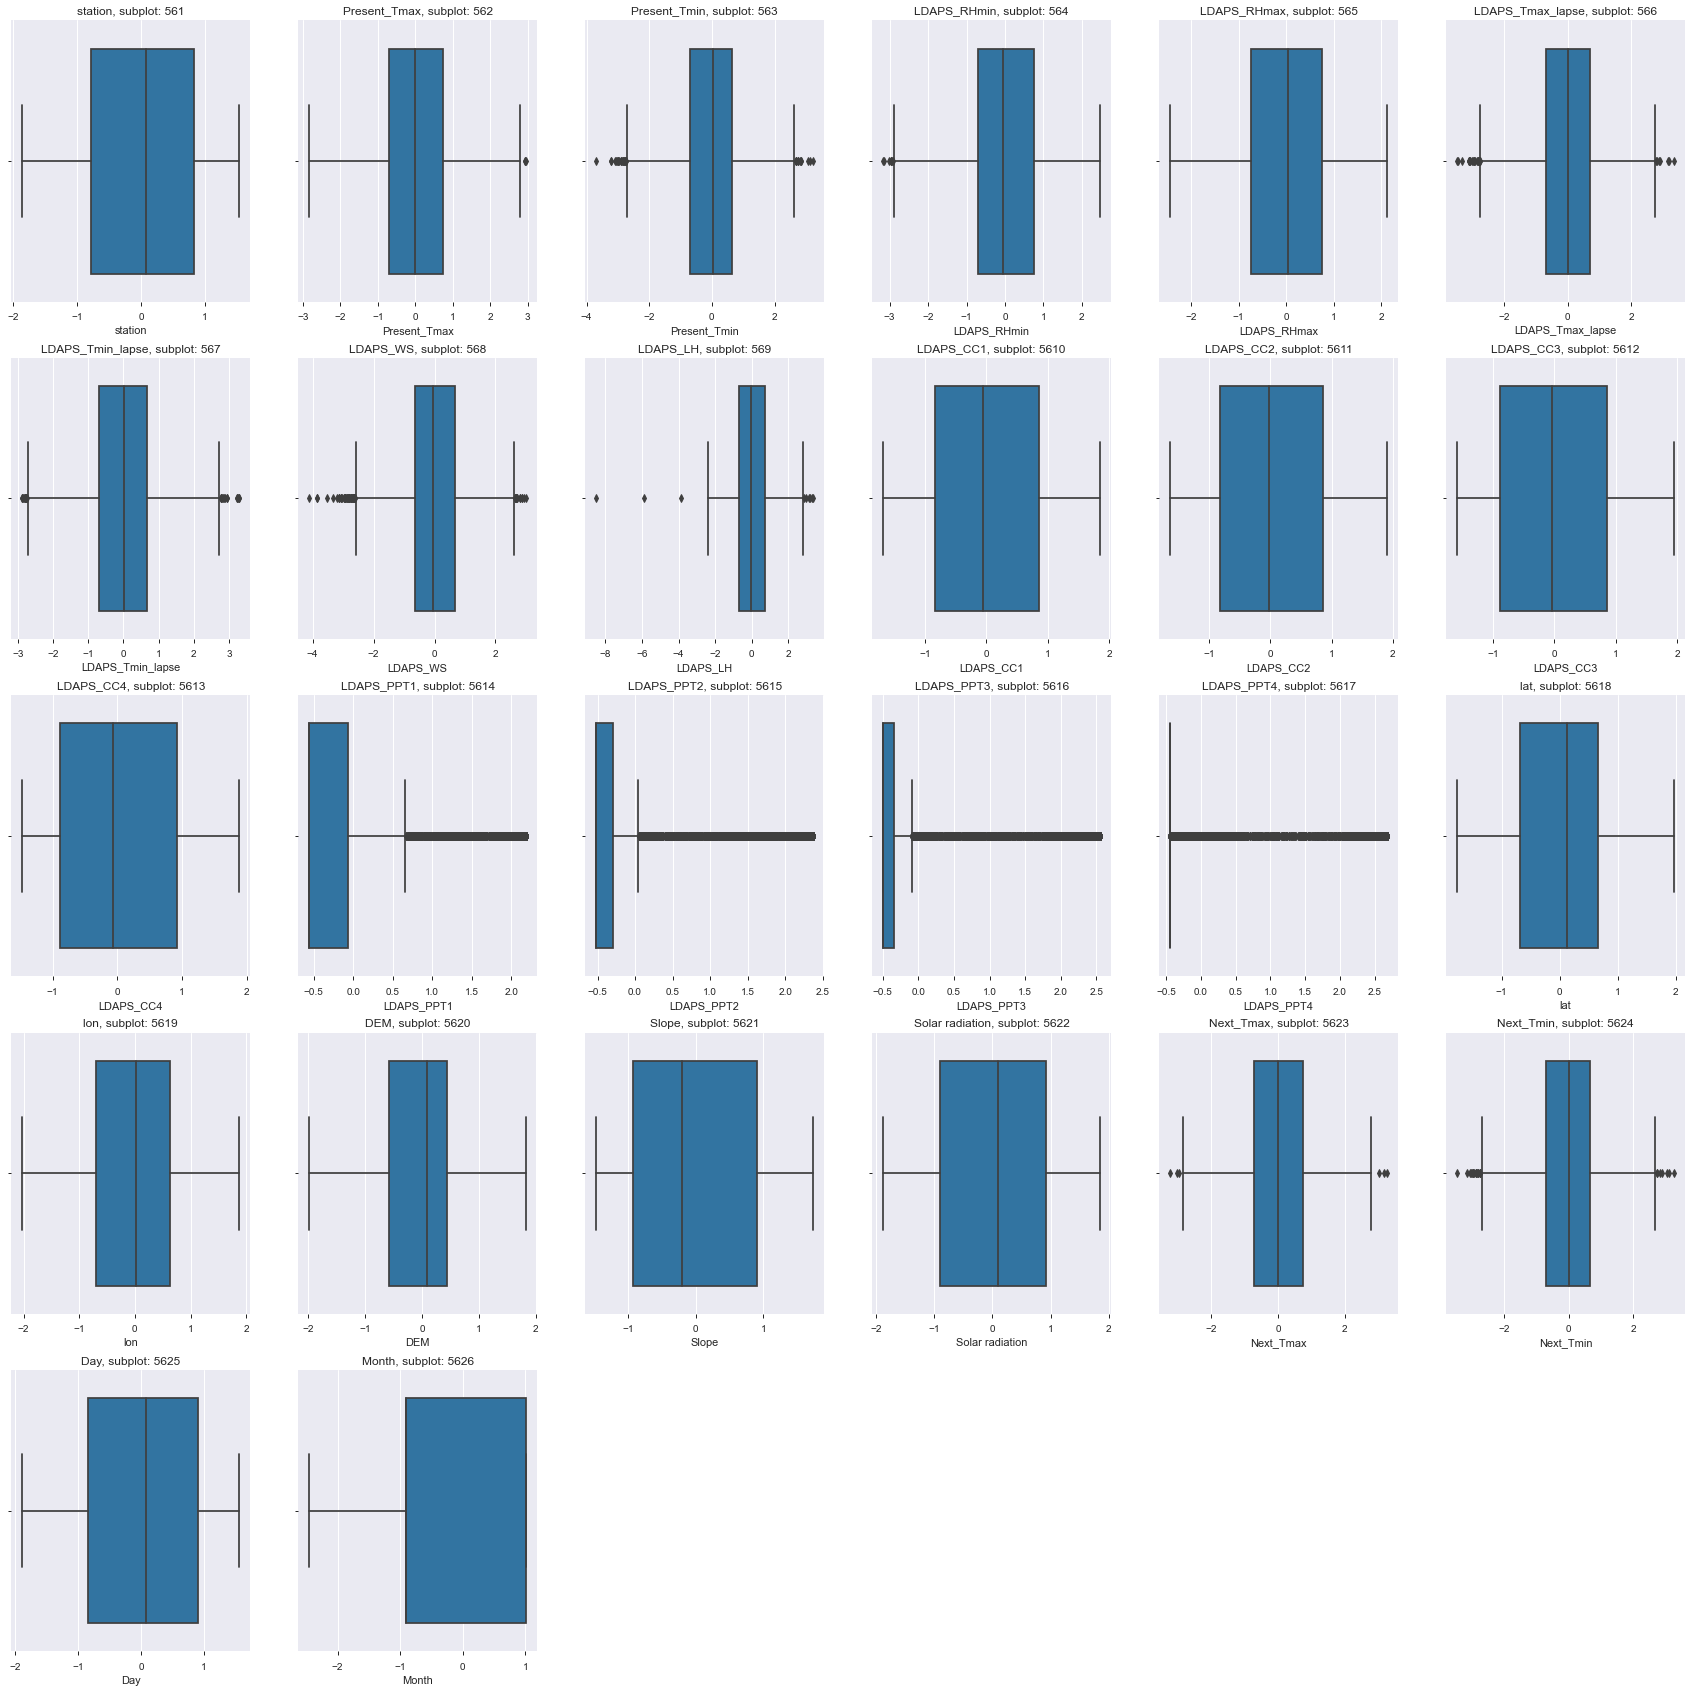

In [133]:
#Outlier check

cols = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month']

a = 5  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,30))

for i in cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x[i])
    c = c + 1

plt.show()

In [134]:
df.shape

(7588, 27)

In [135]:
#calculate z-scores of x to remove outliers
z_scores = zscore(df) 
abs_z_scores = np. abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

NameError: name 'zscore' is not defined

In [ ]:
df=new_df

In [ ]:
#splitting dataframe into x and y
x = df.iloc[:,0:26]
y = df.iloc[:,-2:]

In [ ]:
#checking skewness
x.skew()

In [ ]:
#using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [ ]:
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

In [ ]:
x=df_new

In [ ]:
#Scale the data in x
std = StandardScaler()
x = std.fit_transform(x)


# Random State

In [ ]:
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=i)
    RF= RandomForestRegressor()
    RF.fit(x_train,y_train)
    pred_train=RF.predict(x_train)
    pred_test = RF.predict(x_test)
    print(f"With random state {i}, the training accuracy is: {r2_score(y_train, pred_train)}")
    print(f"With random state {i}, the testing accuracy is: {r2_score(y_test, pred_test)}")
    print("\n")

# Testing Models

In [ ]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=98)

In [ ]:
model_grid = {"Linear": LinearRegression(),
              "KNN": KNeighborsRegressor(),
              "DTR": DecisionTreeRegressor(),
              "RF": RandomForestRegressor(random_state=98)}

scores_dict = {}
for name, model in model_grid.items():
    model.fit(x_train, y_train)
    rmse = np.mean(np.sqrt(-cross_val_score(model, x_test, y_test, cv=5, scoring="neg_mean_squared_error")))
    scores_dict[name] = rmse

scores_dict = {k: v for k, v in sorted(scores_dict.items(), key=lambda item: item[1])}
scores_dict

# Hyper Parameter Tuning

In [ ]:
# Linear Regressor


lr_model = LinearRegression()


lr_param = { "fit_intercept" : [True, False ], "normalize" : [True, False]}


lr_cv_model = RandomizedSearchCV(lr_model, lr_param, cv=10, n_jobs=-1, verbose=1, n_iter=500, scoring='neg_mean_absolute_error').fit(x_train, y_train)



lr_tuned = LinearRegression(**lr_cv_model.best_params_).fit(x_train, y_train)

In [ ]:
# Decision Tree Regressor


dt_model = DecisionTreeRegressor()


dt_param = {"max_depth" : [ 3, 4, 5,],
 "min_samples_split": [2, 5, 10] }


dt_cv_model = RandomizedSearchCV(dt_model, dt_param, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


dt_tuned = DecisionTreeRegressor(**dt_cv_model.best_params_).fit(x_train, y_train)

In [ ]:
# Random Forests Regression


rf_model = RandomForestRegressor(random_state=98)


rf_params = {"max_depth": [5, 8, None],
             "n_estimators": [200, 500],}


rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(x_train, y_train)

In [ ]:
# KNeighbors Regressor 


kn_model = KNeighborsRegressor()


kn_params = {"n_neighbors": [2,3,4,5,6],
             "weights": ['uniform', 'distance']}


kn_cv_model = GridSearchCV(kn_model, kn_params, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


kn_tuned = KNeighborsRegressor(**kn_cv_model.best_params_).fit(x_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from itertools import islice

# set tuned models
tuned_grid = dict([("RF", rf_tuned), ("DTR", dt_tuned), ("Linear", lr_tuned), ("KNR", kn_tuned)])

# get rmse values from tuned models
tuned_scores = {}
for name, model in tuned_grid.items():
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    tuned_scores[name] = rmse

# sorting rmse
tuned_scores = {k: v for k, v in sorted(tuned_scores.items(), key=lambda item: item[1])}

# choose best model
best_model = dict(islice(tuned_scores.items(), 1))
best_model

# Saving the Best Model

In [ ]:
import pickle
filename= 'doctorfees.pkl'
pickle.dump(rf_tuned, open(filename, 'wb'))